Getting the data

In [2]:
! ! pip install kaggle


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:13<00:00, 162MB/s]
100% 2.29G/2.29G [00:13<00:00, 185MB/s]


In [ ]:
#@title Unzip
! unzip chest-xray-pneumonia.zip

In [8]:
#getting some useful custom functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-11-20 16:52:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-20 16:52:03 (56.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [9]:
#training and test directories 
train_direct = "chest_xray/train"
test_direct = "chest_xray/test"

In [10]:
#creating the datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_data = image_dataset_from_directory(directory = train_direct,
                                          label_mode = "binary",
                                          image_size = (256,256),
                                          batch_size =32 
)
test_data = image_dataset_from_directory(directory = test_direct,
                                         label_mode = "binary",
                                         image_size = (256, 256),
                                         batch_size = 32, shuffle = False

                                         )

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


'NORMAL2-IM-1033-0001.jpeg'

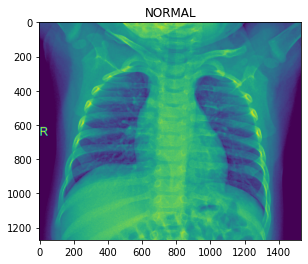

In [11]:
#vistualizing a random image 
direct = "chest_xray/train/"
import os
import random
theclass = random.choice(train_data.class_names)
target_direct = direct + theclass
choice = random.choice(os.listdir(target_direct))
import matplotlib.image as mpimg
image_direct = target_direct + "/" + choice
img = mpimg.imread(image_direct)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(theclass)
choice

In [12]:
from helper_functions import walk_through_dir

In [13]:
walk_through_dir("chest_xray")

There are 5 directories and 0 images in 'chest_xray'.
There are 1 directories and 1 images in 'chest_xray/__MACOSX'.
There are 3 directories and 3 images in 'chest_xray/__MACOSX/chest_xray'.
There are 2 directories and 3 images in 'chest_xray/__MACOSX/chest_xray/train'.
There are 0 directories and 1342 images in 'chest_xray/__MACOSX/chest_xray/train/NORMAL'.
There are 0 directories and 3876 images in 'chest_xray/__MACOSX/chest_xray/train/PNEUMONIA'.
There are 2 directories and 1 images in 'chest_xray/__MACOSX/chest_xray/val'.
There are 0 directories and 9 images in 'chest_xray/__MACOSX/chest_xray/val/NORMAL'.
There are 0 directories and 9 images in 'chest_xray/__MACOSX/chest_xray/val/PNEUMONIA'.
There are 2 directories and 3 images in 'chest_xray/__MACOSX/chest_xray/test'.
There are 0 directories and 234 images in 'chest_xray/__MACOSX/chest_xray/test/NORMAL'.
There are 0 directories and 390 images in 'chest_xray/__MACOSX/chest_xray/test/PNEUMONIA'.
There are 2 directories and 0 images 

In [14]:
#creating a simple convoluted model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Input,GlobalAveragePooling2D

In [ ]:
model_1 = Sequential()

In [ ]:
model_1.add(Conv2D(10,3, activation= "relu", input_shape = (256,256,3)))
model_1.add(Conv2D(10,3, activation = "relu"))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(Conv2D(10,3, activation="relu"))
model_1.add(MaxPooling2D())
model_1.add((Conv2D(10,3, activation="relu")))
model_1.add((Conv2D(10, 3, activation="relu")))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(1, activation = "sigmoid"))

In [ ]:
model_1.compile(optimizer="adam", loss= "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_1.fit(train_data, 
          epochs = 10, 
          steps_per_epoch= len(train_data), 
          validation_data= test_data,
          validation_steps = len(test_data))               

Epoch 1/10
163/163 [==============================] - 33s 99ms/step - loss: 0.5079 - accuracy: 0.8535 - val_loss: 0.8135 - val_accuracy: 0.7196
Epoch 2/10
163/163 [==============================] - 16s 97ms/step - loss: 0.1380 - accuracy: 0.9469 - val_loss: 0.8385 - val_accuracy: 0.7099
Epoch 3/10
163/163 [==============================] - 17s 98ms/step - loss: 0.0966 - accuracy: 0.9630 - val_loss: 0.6640 - val_accuracy: 0.7997
Epoch 4/10
163/163 [==============================] - 17s 98ms/step - loss: 0.0784 - accuracy: 0.9686 - val_loss: 0.6601 - val_accuracy: 0.7949
Epoch 5/10
163/163 [==============================] - 17s 97ms/step - loss: 0.0635 - accuracy: 0.9766 - val_loss: 1.1278 - val_accuracy: 0.7340
Epoch 6/10
163/163 [==============================] - 17s 98ms/step - loss: 0.0473 - accuracy: 0.9831 - val_loss: 0.8374 - val_accuracy: 0.7804
Epoch 7/10
163/163 [==============================] - 17s 99ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 1.2096 - val_accuracy:

In [15]:
#Simple model with data augmentation 
from tensorflow.keras.layers.experimental import preprocessing

data_aug = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)



], name = "data_aug")

In [ ]:
input = Input(shape=(256,256, 3))
x = data_aug(input)
x = Conv2D(10,3, activation= "relu")(x)
x = Conv2D(10,3, activation= "relu")(x)
x = MaxPooling2D()(x)
x = Conv2D(10,3, activation= "relu")(x)
x = Conv2D(10,3, activation= "relu")(x)
x = MaxPooling2D()(x)
x = Conv2D(10,3, activation= "relu")(x)
x = Conv2D(10,3, activation= "relu")(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)

In [ ]:
model_2 = Model(inputs= input, outputs = output)

In [ ]:
model_2.compile(optimizer="adam", loss= "binary_crossentropy", metrics = "accuracy")
model_2.fit(train_data, 
          epochs = 10, 
          steps_per_epoch= len(train_data), 
          validation_data= test_data,
          validation_steps = len(test_data))   

Epoch 1/10
163/163 [==============================] - 56s 333ms/step - loss: 0.5684 - accuracy: 0.7439 - val_loss: 0.6374 - val_accuracy: 0.6282
Epoch 2/10
163/163 [==============================] - 52s 313ms/step - loss: 0.5141 - accuracy: 0.7558 - val_loss: 0.5555 - val_accuracy: 0.7083
Epoch 3/10
163/163 [==============================] - 48s 287ms/step - loss: 0.4451 - accuracy: 0.7889 - val_loss: 0.5961 - val_accuracy: 0.6891
Epoch 4/10
163/163 [==============================] - 46s 277ms/step - loss: 0.3961 - accuracy: 0.8148 - val_loss: 0.4572 - val_accuracy: 0.7901
Epoch 5/10
163/163 [==============================] - 44s 268ms/step - loss: 0.3915 - accuracy: 0.8232 - val_loss: 0.6317 - val_accuracy: 0.6522
Epoch 6/10
163/163 [==============================] - 44s 265ms/step - loss: 0.3572 - accuracy: 0.8336 - val_loss: 0.4899 - val_accuracy: 0.7997
Epoch 7/10
163/163 [==============================] - 44s 265ms/step - loss: 0.3557 - accuracy: 0.8378 - val_loss: 0.4942 - val_ac

Model 3 pretrained 

In [16]:
from tensorflow.keras.applications import EfficientNetB0

In [17]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
input = Input(shape = (256,256,3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_3 = Model(inputs = input, outputs = output)

In [ ]:
model_3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics= "accuracy")
model_3.fit(train_data, epochs = 10, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps = len(test_data))

Epoch 1/10
163/163 [==============================] - 24s 111ms/step - loss: 0.3380 - accuracy: 0.8495 - val_loss: 0.4526 - val_accuracy: 0.7580
Epoch 2/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1841 - accuracy: 0.9363 - val_loss: 0.4256 - val_accuracy: 0.8013
Epoch 3/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1548 - accuracy: 0.9452 - val_loss: 0.4249 - val_accuracy: 0.8093
Epoch 4/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1334 - accuracy: 0.9548 - val_loss: 0.4517 - val_accuracy: 0.8013
Epoch 5/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1216 - accuracy: 0.9544 - val_loss: 0.4668 - val_accuracy: 0.7933
Epoch 6/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1136 - accuracy: 0.9617 - val_loss: 0.3948 - val_accuracy: 0.8365
Epoch 7/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1097 - accuracy: 0.9620 - val_loss: 0.3995 - val_ac

In [ ]:
model_3.fit(train_data, epochs = 5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps = len(test_data))

Epoch 1/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0904 - accuracy: 0.9695 - val_loss: 0.3948 - val_accuracy: 0.8429
Epoch 2/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0899 - accuracy: 0.9705 - val_loss: 0.4332 - val_accuracy: 0.8301
Epoch 3/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0847 - accuracy: 0.9720 - val_loss: 0.4180 - val_accuracy: 0.8381
Epoch 4/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0836 - accuracy: 0.9720 - val_loss: 0.3991 - val_accuracy: 0.8413
Epoch 5/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0802 - accuracy: 0.9734 - val_loss: 0.4742 - val_accuracy: 0.8189


Model 4, augmented pretrained

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_4 = Model(inputs = input, outputs= output)

In [ ]:
model_4.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_4.fit(train_data, epochs = 10, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
163/163 [==============================] - 34s 172ms/step - loss: 0.3522 - accuracy: 0.8455 - val_loss: 0.4356 - val_accuracy: 0.8093
Epoch 2/10
163/163 [==============================] - 24s 142ms/step - loss: 0.2335 - accuracy: 0.9118 - val_loss: 0.3854 - val_accuracy: 0.8429
Epoch 3/10
163/163 [==============================] - 23s 135ms/step - loss: 0.2051 - accuracy: 0.9187 - val_loss: 0.3582 - val_accuracy: 0.8574
Epoch 4/10
163/163 [==============================] - 21s 126ms/step - loss: 0.1885 - accuracy: 0.9229 - val_loss: 0.3422 - val_accuracy: 0.8558
Epoch 5/10
163/163 [==============================] - 21s 126ms/step - loss: 0.1828 - accuracy: 0.9310 - val_loss: 0.3272 - val_accuracy: 0.8718
Epoch 6/10
163/163 [==============================] - 20s 120ms/step - loss: 0.1708 - accuracy: 0.9333 - val_loss: 0.3149 - val_accuracy: 0.8718
Epoch 7/10
163/163 [==============================] - 20s 117ms/step - loss: 0.1716 - accuracy: 0.9329 - val_loss: 0.3026 - val_ac

In [ ]:
model_4.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 19s 112ms/step - loss: 0.1451 - accuracy: 0.9463 - val_loss: 0.2865 - val_accuracy: 0.9022
Epoch 2/5
163/163 [==============================] - 19s 111ms/step - loss: 0.1506 - accuracy: 0.9444 - val_loss: 0.2689 - val_accuracy: 0.8974
Epoch 3/5
163/163 [==============================] - 19s 110ms/step - loss: 0.1476 - accuracy: 0.9467 - val_loss: 0.2779 - val_accuracy: 0.8990
Epoch 4/5
163/163 [==============================] - 18s 109ms/step - loss: 0.1361 - accuracy: 0.9471 - val_loss: 0.2664 - val_accuracy: 0.8942
Epoch 5/5
163/163 [==============================] - 19s 110ms/step - loss: 0.1388 - accuracy: 0.9456 - val_loss: 0.2754 - val_accuracy: 0.9006


Model 5, augmented pretrained some layers trainable last 17 layers:


In [ ]:
for i in range(220, len(base_model.layers)):
  base_model.layers[i].trainable = True

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_5 = Model(inputs = input, outputs= output)

In [ ]:
model_5.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")


In [ ]:
model_5.fit(train_data, epochs = 15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/15
163/163 [==============================] - 25s 115ms/step - loss: 0.3719 - accuracy: 0.8606 - val_loss: 0.4293 - val_accuracy: 0.8077
Epoch 2/15
163/163 [==============================] - 18s 108ms/step - loss: 0.2380 - accuracy: 0.9147 - val_loss: 0.4171 - val_accuracy: 0.8029
Epoch 3/15
163/163 [==============================] - 18s 109ms/step - loss: 0.2173 - accuracy: 0.9153 - val_loss: 0.4022 - val_accuracy: 0.8013
Epoch 4/15
163/163 [==============================] - 19s 109ms/step - loss: 0.1961 - accuracy: 0.9250 - val_loss: 0.3716 - val_accuracy: 0.8301
Epoch 5/15
163/163 [==============================] - 19s 110ms/step - loss: 0.1822 - accuracy: 0.9308 - val_loss: 0.4033 - val_accuracy: 0.7997
Epoch 6/15
163/163 [==============================] - 19s 110ms/step - loss: 0.1878 - accuracy: 0.9300 - val_loss: 0.3553 - val_accuracy: 0.8365
Epoch 7/15
163/163 [==============================] - 18s 108ms/step - loss: 0.1694 - accuracy: 0.9371 - val_loss: 0.3808 - val_ac

Model 6, augmented pretrained some layers trainable last 5 layers





In [22]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for i in range(231, len(base_model.layers)):
  base_model.layers[i].trainable = True

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_6 = Model(inputs = input, outputs= output)

In [ ]:
model_6.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_6.fit(train_data, epochs = 15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/15
163/163 [==============================] - 24s 114ms/step - loss: 0.3796 - accuracy: 0.8491 - val_loss: 0.4297 - val_accuracy: 0.8093
Epoch 2/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2430 - accuracy: 0.9109 - val_loss: 0.3921 - val_accuracy: 0.8253
Epoch 3/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2172 - accuracy: 0.9151 - val_loss: 0.3811 - val_accuracy: 0.8301
Epoch 4/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2016 - accuracy: 0.9225 - val_loss: 0.3753 - val_accuracy: 0.8317
Epoch 5/15
163/163 [==============================] - 18s 107ms/step - loss: 0.1869 - accuracy: 0.9283 - val_loss: 0.3876 - val_accuracy: 0.8093
Epoch 6/15
163/163 [==============================] - 18s 107ms/step - loss: 0.1806 - accuracy: 0.9325 - val_loss: 0.3459 - val_accuracy: 0.8510
Epoch 7/15
163/163 [==============================] - 19s 113ms/step - loss: 0.1811 - accuracy: 0.9294 - val_loss: 0.3468 - val_ac

Model 7, augmented pretrained some layers trainable last  layers


In [ ]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

In [ ]:
base_model.layers[236].trainable = True

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_7 = Model(inputs = input, outputs= output)

In [ ]:
model_7.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_7.fit(train_data, epochs = 15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/15
163/163 [==============================] - 25s 114ms/step - loss: 0.3749 - accuracy: 0.8305 - val_loss: 0.4444 - val_accuracy: 0.8045
Epoch 2/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2373 - accuracy: 0.9089 - val_loss: 0.3799 - val_accuracy: 0.8381
Epoch 3/15
163/163 [==============================] - 18s 108ms/step - loss: 0.2041 - accuracy: 0.9224 - val_loss: 0.3542 - val_accuracy: 0.8446
Epoch 4/15
163/163 [==============================] - 18s 107ms/step - loss: 0.1839 - accuracy: 0.9325 - val_loss: 0.3296 - val_accuracy: 0.8702
Epoch 5/15
163/163 [==============================] - 18s 106ms/step - loss: 0.1753 - accuracy: 0.9327 - val_loss: 0.3180 - val_accuracy: 0.8750
Epoch 6/15
163/163 [==============================] - 18s 106ms/step - loss: 0.1665 - accuracy: 0.9383 - val_loss: 0.3073 - val_accuracy: 0.8766
Epoch 7/15
163/163 [==============================] - 18s 106ms/step - loss: 0.1676 - accuracy: 0.9365 - val_loss: 0.3149 - val_ac

In [ ]:
model_7.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 19s 110ms/step - loss: 0.1355 - accuracy: 0.9513 - val_loss: 0.2724 - val_accuracy: 0.9006
Epoch 2/5
163/163 [==============================] - 18s 108ms/step - loss: 0.1371 - accuracy: 0.9459 - val_loss: 0.2817 - val_accuracy: 0.8942
Epoch 3/5
163/163 [==============================] - 18s 109ms/step - loss: 0.1372 - accuracy: 0.9475 - val_loss: 0.3124 - val_accuracy: 0.8766
Epoch 4/5
163/163 [==============================] - 18s 108ms/step - loss: 0.1321 - accuracy: 0.9488 - val_loss: 0.2700 - val_accuracy: 0.8942
Epoch 5/5
163/163 [==============================] - 18s 108ms/step - loss: 0.1319 - accuracy: 0.9507 - val_loss: 0.2639 - val_accuracy: 0.8942


Model 8 Pretrained, weights locked for 5 epochs then trainable for 10

In [23]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

In [ ]:
input = Input(shape=(256,256,3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_8 = Model(inputs = input, outputs = output) 

In [17]:
initial_epochs = 5

In [ ]:
model_8.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")
model_8.fit(train_data, epochs=initial_epochs, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 32s 150ms/step - loss: 0.3621 - accuracy: 0.8361 - val_loss: 0.4510 - val_accuracy: 0.7933
Epoch 2/5
163/163 [==============================] - 23s 138ms/step - loss: 0.2292 - accuracy: 0.9116 - val_loss: 0.3962 - val_accuracy: 0.8285
Epoch 3/5
163/163 [==============================] - 23s 137ms/step - loss: 0.1992 - accuracy: 0.9237 - val_loss: 0.3634 - val_accuracy: 0.8446
Epoch 4/5
163/163 [==============================] - 23s 135ms/step - loss: 0.1938 - accuracy: 0.9245 - val_loss: 0.3376 - val_accuracy: 0.8718
Epoch 5/5
163/163 [==============================] - 23s 135ms/step - loss: 0.1731 - accuracy: 0.9346 - val_loss: 0.3287 - val_accuracy: 0.8926


In [ ]:
#making the last 5 layers trainabe o
for i in range(231, len(base_model.layers)):
 model_8.layers[2].layers[i].trainable = True

In [ ]:
model_8.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1794 - accuracy: 0.9293 - val_loss: 0.3147 - val_accuracy: 0.8846
Epoch 2/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1640 - accuracy: 0.9383 - val_loss: 0.2989 - val_accuracy: 0.8830
Epoch 3/10
163/163 [==============================] - 23s 133ms/step - loss: 0.1582 - accuracy: 0.9356 - val_loss: 0.2905 - val_accuracy: 0.8894
Epoch 4/10
163/163 [==============================] - 22s 131ms/step - loss: 0.1504 - accuracy: 0.9411 - val_loss: 0.2979 - val_accuracy: 0.8926
Epoch 5/10
163/163 [==============================] - 23s 133ms/step - loss: 0.1547 - accuracy: 0.9379 - val_loss: 0.2889 - val_accuracy: 0.8830
Epoch 6/10
163/163 [==============================] - 22s 132ms/step - loss: 0.1498 - accuracy: 0.9429 - val_loss: 0.2792 - val_accuracy: 0.9022
Epoch 7/10
163/163 [==============================] - 22s 131ms/step - loss: 0.1413 - accuracy: 0.9450 - val_loss: 0.2811 - val_ac

In [ ]:
model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 22s 130ms/step - loss: 0.1376 - accuracy: 0.9500 - val_loss: 0.2939 - val_accuracy: 0.8894
Epoch 2/5
163/163 [==============================] - 22s 132ms/step - loss: 0.1264 - accuracy: 0.9519 - val_loss: 0.2630 - val_accuracy: 0.9054
Epoch 3/5
163/163 [==============================] - 22s 130ms/step - loss: 0.1368 - accuracy: 0.9454 - val_loss: 0.2640 - val_accuracy: 0.9054
Epoch 4/5
163/163 [==============================] - 22s 129ms/step - loss: 0.1357 - accuracy: 0.9498 - val_loss: 0.3046 - val_accuracy: 0.8782
Epoch 5/5
163/163 [==============================] - 22s 131ms/step - loss: 0.1316 - accuracy: 0.9494 - val_loss: 0.2684 - val_accuracy: 0.8942


#Model 9 Trying EfficientNetB3 Aug



In [18]:
from tensorflow.keras.applications import EfficientNetB3

In [19]:
base_modelB3 = EfficientNetB3(include_top=False)
base_modelB3.trainable = False

43950080/43941136 [==============================] - 0s 0us/step


In [64]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_modelB3(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation= 'sigmoid')(x)
model_9 = Model(inputs = input, outputs = output)

In [65]:
model_9.compile(optimizer = "adam", loss = "binary_crossentropy", metrics= ['accuracy'])
model_9.fit(train_data, epochs=10, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
163/163 [==============================] - 33s 151ms/step - loss: 0.3465 - accuracy: 0.8510 - val_loss: 0.3520 - val_accuracy: 0.8542
Epoch 2/10
163/163 [==============================] - 23s 137ms/step - loss: 0.2159 - accuracy: 0.9189 - val_loss: 0.3109 - val_accuracy: 0.8798
Epoch 3/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1833 - accuracy: 0.9302 - val_loss: 0.2933 - val_accuracy: 0.8766
Epoch 4/10
163/163 [==============================] - 23s 136ms/step - loss: 0.1732 - accuracy: 0.9340 - val_loss: 0.2708 - val_accuracy: 0.8894
Epoch 5/10
163/163 [==============================] - 23s 136ms/step - loss: 0.1638 - accuracy: 0.9400 - val_loss: 0.2616 - val_accuracy: 0.8990
Epoch 6/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1581 - accuracy: 0.9398 - val_loss: 0.2711 - val_accuracy: 0.8766
Epoch 7/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1622 - accuracy: 0.9373 - val_loss: 0.2565 - val_ac

In [66]:
model_9.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 23s 134ms/step - loss: 0.1408 - accuracy: 0.9463 - val_loss: 0.2416 - val_accuracy: 0.9038
Epoch 2/5
163/163 [==============================] - 23s 135ms/step - loss: 0.1360 - accuracy: 0.9482 - val_loss: 0.2472 - val_accuracy: 0.8926
Epoch 3/5
163/163 [==============================] - 22s 129ms/step - loss: 0.1356 - accuracy: 0.9484 - val_loss: 0.2460 - val_accuracy: 0.9022
Epoch 4/5
163/163 [==============================] - 22s 132ms/step - loss: 0.1257 - accuracy: 0.9496 - val_loss: 0.2404 - val_accuracy: 0.9006
Epoch 5/5
163/163 [==============================] - 22s 130ms/step - loss: 0.1345 - accuracy: 0.9461 - val_loss: 0.2484 - val_accuracy: 0.8958


In [67]:
#the loss seems to continously go down so MORE EPOCHS!!!!!
model_9.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 21s 126ms/step - loss: 0.1272 - accuracy: 0.9534 - val_loss: 0.2502 - val_accuracy: 0.8910
Epoch 2/5
163/163 [==============================] - 22s 130ms/step - loss: 0.1298 - accuracy: 0.9492 - val_loss: 0.2515 - val_accuracy: 0.8958
Epoch 3/5
163/163 [==============================] - 22s 131ms/step - loss: 0.1261 - accuracy: 0.9492 - val_loss: 0.2374 - val_accuracy: 0.9054
Epoch 4/5
163/163 [==============================] - 22s 129ms/step - loss: 0.1268 - accuracy: 0.9515 - val_loss: 0.2417 - val_accuracy: 0.8990
Epoch 5/5
163/163 [==============================] - 22s 128ms/step - loss: 0.1272 - accuracy: 0.9505 - val_loss: 0.2406 - val_accuracy: 0.8958


In [ ]:
#Seems to preform slightly better 

In [45]:
model_9.evaluate(test_data)

20/20 [==============================] - 3s 101ms/step - loss: 0.2359 - accuracy: 0.9087


[0.23593612015247345, 0.9086538553237915]

In [20]:
import tensorflow as tf

In [77]:
data

array([[[[1.52500000e+01, 1.52500000e+01, 1.52500000e+01],
         [1.52500000e+01, 1.52500000e+01, 1.52500000e+01],
         [1.52500000e+01, 1.52500000e+01, 1.52500000e+01],
         ...,
         [7.81250000e-01, 7.81250000e-01, 7.81250000e-01],
         [1.25000000e+00, 1.25000000e+00, 1.25000000e+00],
         [1.25000000e+00, 1.25000000e+00, 1.25000000e+00]],

        [[1.47500000e+01, 1.47500000e+01, 1.47500000e+01],
         [1.47500000e+01, 1.47500000e+01, 1.47500000e+01],
         [1.47500000e+01, 1.47500000e+01, 1.47500000e+01],
         ...,
         [5.93750000e-01, 5.93750000e-01, 5.93750000e-01],
         [7.50000000e-01, 7.50000000e-01, 7.50000000e-01],
         [7.50000000e-01, 7.50000000e-01, 7.50000000e-01]],

        [[1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
         [1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
         [1.40000000e+01, 1.40000000e+01, 1.40000000e+01],
         ...,
         [9.37500000e-01, 9.37500000e-01, 9.37500000e-01],
         [

In [21]:
def test_labeller(test_data):
  #because individual labels are 1 dim vects  
  import numpy as np
  test_label = np.concatenate([y for x, y in test_data], axis=0) 
  test_labels = list(map(int, test_label))
  return test_labels

In [23]:
#predicting
def model_predict(model, test_data):
  y_predicts = tf.round(model_9.predict(test_data))
  y_predicts = list(map(int,y_predicts))
  return y_predicts

In [100]:
y_labels = test_labeller(test_data)

In [101]:
y_predict = model_predict(model_9, test_data)

In [102]:
tf.math.confusion_matrix(y_labels, y_predict)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[188,  46],
       [ 19, 371]], dtype=int32)>

In [24]:
#creating confusion matrix
def creating_confusion(model, test_data):
  def test_labeller(test_data):
  #because individual labels are 1 dim vects  
    import numpy as np
    test_label = np.concatenate([y for x, y in test_data], axis=0) 
    test_labels = list(map(int, test_label))
    return test_labels

  def model_predict(model, test_data):
    import tensorflow as tf 
    y_predicts = tf.round(model_9.predict(test_data))
    y_predicts = list(map(int,y_predicts))
    return y_predicts

  pred = model_predict(model, test_data)
  labels = test_labeller(test_data)
  return tf.math.confusion_matrix(labels, pred)

In [108]:
creating_confusion(model_9, test_data)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[188,  46],
       [ 19, 371]], dtype=int32)>

# EfficienetB3 last 10 layers not trainable for 10 epochs the trainable for 10 (model 10):

In [30]:
input = Input(shape = (256,256,3))
x = data_aug(input)
x = base_modelB3(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation= "sigmoid")(x)
 
#intial training epochs
intial_epochs = 10

model_10 = Model(inputs = input, outputs = output)
model_10.compile(optimizer = "adam", 
                 loss = "binary_crossentropy",
                 metrics = "accuracy")
model_10.fit(train_data, 
                 epochs = intial_epochs, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )


Epoch 1/10
163/163 [==============================] - 38s 158ms/step - loss: 0.3441 - accuracy: 0.8560 - val_loss: 0.3762 - val_accuracy: 0.8365
Epoch 2/10
163/163 [==============================] - 24s 141ms/step - loss: 0.2230 - accuracy: 0.9147 - val_loss: 0.3265 - val_accuracy: 0.8638
Epoch 3/10
163/163 [==============================] - 24s 140ms/step - loss: 0.1874 - accuracy: 0.9306 - val_loss: 0.3245 - val_accuracy: 0.8574
Epoch 4/10
163/163 [==============================] - 24s 140ms/step - loss: 0.1752 - accuracy: 0.9354 - val_loss: 0.3179 - val_accuracy: 0.8606
Epoch 5/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1684 - accuracy: 0.9344 - val_loss: 0.2700 - val_accuracy: 0.8782
Epoch 6/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1612 - accuracy: 0.9400 - val_loss: 0.2613 - val_accuracy: 0.8798
Epoch 7/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1566 - accuracy: 0.9400 - val_loss: 0.2599 - val_ac

In [31]:
for i in range(226, len(model_10.layers[2].layers)):
  model_10.layers[2].layers[i].trainable = True

In [32]:
model_10.fit(train_data, 
                 epochs = intial_epochs, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )

Epoch 1/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1382 - accuracy: 0.9473 - val_loss: 0.2442 - val_accuracy: 0.8990
Epoch 2/10
163/163 [==============================] - 23s 136ms/step - loss: 0.1431 - accuracy: 0.9467 - val_loss: 0.2475 - val_accuracy: 0.9022
Epoch 3/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1323 - accuracy: 0.9488 - val_loss: 0.2603 - val_accuracy: 0.8974
Epoch 4/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1384 - accuracy: 0.9477 - val_loss: 0.2391 - val_accuracy: 0.9022
Epoch 5/10
163/163 [==============================] - 24s 139ms/step - loss: 0.1278 - accuracy: 0.9528 - val_loss: 0.2353 - val_accuracy: 0.9054
Epoch 6/10
163/163 [==============================] - 23s 136ms/step - loss: 0.1305 - accuracy: 0.9507 - val_loss: 0.2344 - val_accuracy: 0.9087
Epoch 7/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1289 - accuracy: 0.9496 - val_loss: 0.2336 - val_ac

In [34]:
#loss seems to still be imporoving will run for MORE epochs
model_10.fit(train_data, 
                 epochs = 10, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )

Epoch 1/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1155 - accuracy: 0.9567 - val_loss: 0.2305 - val_accuracy: 0.9119
Epoch 2/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1135 - accuracy: 0.9561 - val_loss: 0.2300 - val_accuracy: 0.9151
Epoch 3/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1112 - accuracy: 0.9574 - val_loss: 0.2301 - val_accuracy: 0.9103
Epoch 4/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1197 - accuracy: 0.9509 - val_loss: 0.2292 - val_accuracy: 0.9151
Epoch 5/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1051 - accuracy: 0.9617 - val_loss: 0.2263 - val_accuracy: 0.9231
Epoch 6/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1163 - accuracy: 0.9536 - val_loss: 0.2271 - val_accuracy: 0.9167
Epoch 7/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1086 - accuracy: 0.9594 - val_loss: 0.2311 - val_ac

In [35]:
#5 more epochs
model_10.fit(train_data, 
                 epochs = 10, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )

Epoch 1/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1133 - accuracy: 0.9588 - val_loss: 0.2352 - val_accuracy: 0.9038
Epoch 2/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1121 - accuracy: 0.9549 - val_loss: 0.2273 - val_accuracy: 0.9199
Epoch 3/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1150 - accuracy: 0.9557 - val_loss: 0.2388 - val_accuracy: 0.9022
Epoch 4/10
163/163 [==============================] - 23s 133ms/step - loss: 0.1101 - accuracy: 0.9561 - val_loss: 0.2291 - val_accuracy: 0.9119
Epoch 5/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1083 - accuracy: 0.9590 - val_loss: 0.2287 - val_accuracy: 0.9087
Epoch 6/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1101 - accuracy: 0.9561 - val_loss: 0.2259 - val_accuracy: 0.9103
Epoch 7/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1127 - accuracy: 0.9563 - val_loss: 0.2350 - val_ac

In [ ]:
#

EfficienetB7 Data Aug model 11

In [36]:
from tensorflow.keras.applications import EfficientNetB7

In [47]:
base_modelB7 = EfficientNetB7(include_top=False)
base_modelB7.trainable = False

In [48]:
input = Input(shape = (256,256,3))
x = data_aug(input)
x = base_modelB7(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation= "sigmoid")(x)
model_11 = Model(inputs= input, outputs =output)

In [49]:
model_11.compile(optimizer = "adam", 
                 loss = "binary_crossentropy",
                 metrics = "accuracy")
model_11.fit(train_data, 
                 epochs = 10, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )

Epoch 1/10
163/163 [==============================] - 109s 522ms/step - loss: 0.3348 - accuracy: 0.8616 - val_loss: 0.3957 - val_accuracy: 0.8349
Epoch 2/10
163/163 [==============================] - 73s 440ms/step - loss: 0.2137 - accuracy: 0.9170 - val_loss: 0.3634 - val_accuracy: 0.8462
Epoch 3/10
163/163 [==============================] - 71s 431ms/step - loss: 0.1904 - accuracy: 0.9268 - val_loss: 0.3214 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 69s 415ms/step - loss: 0.1776 - accuracy: 0.9312 - val_loss: 0.3195 - val_accuracy: 0.8686
Epoch 5/10
163/163 [==============================] - 67s 403ms/step - loss: 0.1732 - accuracy: 0.9329 - val_loss: 0.3155 - val_accuracy: 0.8702
Epoch 6/10
163/163 [==============================] - 65s 395ms/step - loss: 0.1664 - accuracy: 0.9381 - val_loss: 0.3409 - val_accuracy: 0.8462
Epoch 7/10
163/163 [==============================] - 63s 382ms/step - loss: 0.1571 - accuracy: 0.9404 - val_loss: 0.2998 - val_a

In [50]:
#seems to be overfitting 